In [2]:
#Imports
import sys
sys.path.append('../python/')
#import NGC5533_functions-newmag as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp
import scipy.interpolate as inter
#import noordermeer as noord

from datetime import datetime
import time

In [17]:
#import data files:
starttime = time.time()

#TRACING:**************************************
#data points:
data = dp.getXYdata_wXYerr('../NGC_5005/traced_data/ngc5005_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#gas rotmod:
gas_rdata = dp.getXYZdata('rotmod_gas.dat')
rgasr = gas_rdata['xx']
rgasv = gas_rdata['zz']
rgasv=np.asarray(rgasv)

#make gas array same length as data points array ????? how can I fit without doing this?????
rgasv=rgasv[:len(rgasv)-9]
rgasv=rgasv[0::76]


#bulge rotmod:
bulge_rdata = dp.getXYZdata('bulge_with_mass.dat')
rbulger = bulge_rdata['xx']
rbulgev = bulge_rdata['zz']
rbulgev=np.asarray(rbulgev)

rbulgev=rbulgev[:len(rbulgev)-12]
rbulgev=rbulgev[0::70]

#disk rotmod:
disk_rdata = dp.getXYZdata('disk_w_mass.dat')
rdiskr = disk_rdata['xx']
rdiskv = disk_rdata['zz']
rdiskv=np.asarray(rdiskv)

rdiskv=rdiskv[:len(rdiskv)-12]
rdiskv=rdiskv[0::70]

#Halo datathief trace:
halo_dt = dp.getXYdata('../NGC_5005/datatheif_halo_spline.txt')
halo_dtr = halo_dt['xx']
halo_dtv = halo_dt['yy']
halo_dtv=np.asarray(halo_dtv)

halo_dtv=halo_dtv[:len(halo_dtv)-11]
halo_dtv=halo_dtv[0::6]

print(len(v_dat))
print(len(rbulgev))
print(len(rdiskv))
print(len(halo_dtv))

17
17
17
17


In [18]:
# Fitting function, just prefactors for all the components
def g(r,GX,BX,DX,HX):
    return np.sqrt((GX*rgasv)**2 
                   + (BX*rbulgev)**2 
                   + (DX*rdiskv)**2
                   + (HX*halo_dtv)**2)

In [42]:
# LMFit

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#Gas
g_params.add('GX', value=1, min=.3, max=1) #Mass

#Bulge
g_params.add('BX', value=1, min=.3, max=.8)          #Prefactor

#Disk
g_params.add('DX', value=1, min=.3, max=.8)       #Prefactor
#Halo
g_params.add('HX', value=1, min=.3, max=.8)          #Core radius (kpc)

#Do fit
g_fit = g_mod.fit(v_dat,g_params,r=r_dat)

In [43]:
# Define for plotting
bestg = g_fit.best_fit
#delg = g_fit.eval_uncertainty()
print('Fit information for all-component fit:')
g_fit

Fit information for all-component fit:


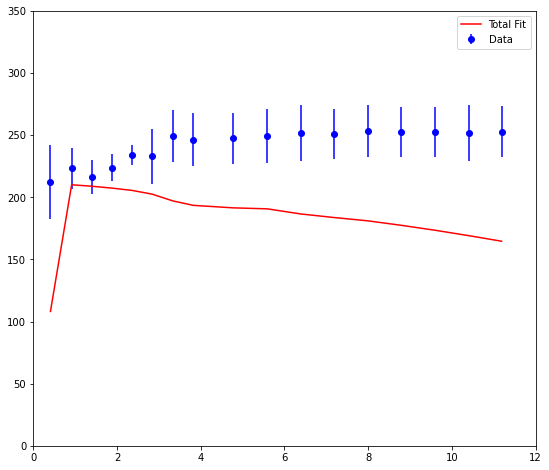

In [44]:
# Plot fitted curves to 105kpc
plt.figure(figsize=(9.0,8.0))
plt.xlim(0,12)
plt.ylim(0,350)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,bestg,'r-',label='Total Fit')

plt.legend()
#plt.savefig('Fitting_allcomponents_125kpc.png')
plt.show()

1301


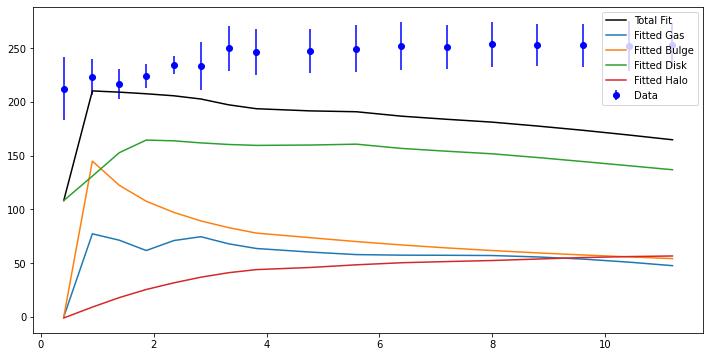

In [45]:
# Define for plotting cont.

rval = np.arange(0.1,200,0.1)
g_dict = g_fit.best_values
g_g = g_dict['GX']
g_b = g_dict['BX']
g_d = g_dict['DX']
g_h = g_dict['HX']


plt.figure(figsize=(12,6))
print(len(rgasr))
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,bestg,'k',label='Total Fit')
plt.plot(r_dat,g_g*rgasv,label='Fitted Gas')
plt.plot(r_dat,g_b*rbulgev,label='Fitted Bulge')
plt.plot(r_dat,g_d*rdiskv,label='Fitted Disk')
plt.plot(r_dat,g_h*halo_dtv,label='Fitted Halo')

plt.legend()
plt.show()